# Starting with Quantum Computing

# Table of Contents

1. [Qubit Initializing](#init)
2. [Basic Gates](#basic) <br>
    2.1 [U$_3$ Gate](#u3) <br>
    2.2 [U$_2$ Gate](#u2)<br>
    2.3 [U$_1$ Gate](#u1)<br>
    2.4 [Hadamard Gate](#hadamard)<br>
    2.5 [X Gate](#x)<br>
3. [Multi-Qubit Gates](#multi)<br>
    3.1 [CNOT Gate](#cnot)<br>
    3.2 [SWAP Gate](#swap)<br>
    3.3 [Toffoli Gate](#toffoli)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QISKitError
from qiskit import available_backends, execute, register, get_backend, least_busy
from qiskit.tools.visualization import circuit_drawer, plot_histogram, matplotlib_circuit_drawer as drawer
from qiskit.tools.qi.qi import state_fidelity
from qiskit import unregister, registered_providers
from qiskit.backends.local.localprovider import LocalProvider

In [3]:
for provider in registered_providers():
    if not isinstance(provider, LocalProvider):
        unregister(provider)
qx_config = {
    "APItoken":"bad8fd2aba4b1154108dec4b307471b8c20f32afe6b98e59b723f29c0bfc455d4b19e7783ce8d60cd52369909a15349d0d571d1246dedc43ffc21e03ca13a07a",
    "url":"https://quantumexperience.ng.bluemix.net/api"}
register(qx_config['APItoken'], qx_config['url'])
print(available_backends({'simulator': False, 'local': False}))
backend = least_busy(available_backends({'simulator': False, 'local': False}))

['ibmqx2', 'ibmqx4', 'ibmqx5']


<a id="init"></a>
# Qubit Initializing

To construct a quantum circuit, at first we need to define how many registers of quantum bits we want to have.
We also need to tell Qiskit the number of qubits per register.
At last we want classical registers to measure the output of our qubits at the end.

Qubits are always initialized at state $|0 \rangle$.

In [4]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

<a id="basic"></a>
# Basic Gates

As in classic computation, the calculations on a quantum computer are made through logic gates. As a qubit does not only have the definite states $|0 \rangle$ or $|0 \rangle$, but can be in a superposition $\alpha |0 \rangle + \beta |1 \rangle$ of both states, the quantum logic gates differ from the classical logic gates.

We start with the most basic gates, the rotation gates.

The state of a qubit can be represented as a point on a sphere, the so called Blochsphere. Every change of the state can then be viewed as a rotation on this sphere.
Here is the Blochsphere with a change between states. At first the qubit is in state $| 0 \rangle$. It is then changed to a state $\alpha |0 \rangle + \beta |1 \rangle$.

!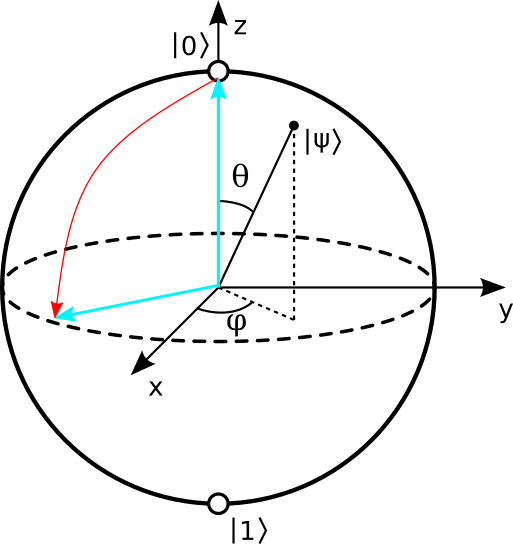

In a quantum circuit, various gates are executed. At the end a measurement is made. Unlike the quantum logic gates a measurement is irreversible and destroys the quantum state of the qubit. It therefore can only happen at the very end of a circuit.

<a id="u3"></a>
## U$_3$ Gate

The most general rotation gate is the U$_3$ gate. It needs three angles as an input and can be constructed through:

$$ U_3 (\theta, \phi, \lambda) =\begin{pmatrix}
cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) \\
\end{pmatrix}$$




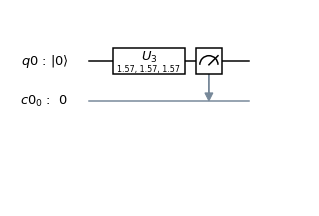

In [12]:
qc = QuantumCircuit(q, c)
qc.u3(pi/2, pi/2, pi/2,q)
qc.measure(q, c)
drawer(qc)

If we want to see what effect the gate had on the qubit, there are two possibilities. 

We can either run the circuit with the statevector simulator, which shows us in what state the qubit is after the gate

or

with a quantum computer simulator or a real device using the IBM Q Experience. In this case we could run the circuit very often and get the probability distribution of the qubit. This is what we do now as it provides nicer outputs.


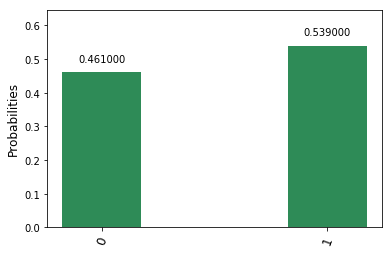

[0.707+0.j    0.   +0.707j]


In [14]:
job = execute(qc, backend='local_qasm_simulator', shots = 1000)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

qc = QuantumCircuit(q, c)
qc.u3(pi/2, pi/2, pi/2,q)
job = execute(qc, backend='local_statevector_simulator')
print("Statevector = ", np.round(job.result().get_statevector(), 3))


We will only use the statevector a few times.

When we use $\pi / 2$ for all angles, the qubit is then in an equal superposition of both states $| 0 \rangle$ and $ | 1 \rangle$. If we use different angles for the rotation, this changes depending on the angle.

<a id="u2"></a>
## U$_2$ Gate

As we do not always need an arbitrary rotation, we can also use the U$_2$ gate. This gate sets the angle $\theta$ to $\pi /2$. This is useful to create superposition.

$$ U_2 (\phi, \lambda) = U_3 (\pi /2, \phi, \lambda) = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\phi} & e^{i\lambda+i\phi} \\
\end{pmatrix}$$

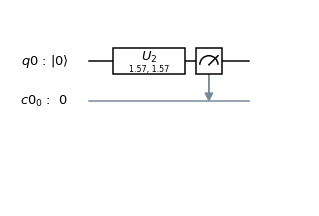

In [15]:
qc = QuantumCircuit(q, c)
qc.u2(pi/2,pi/2,q)
qc.measure(q, c)
drawer(qc)

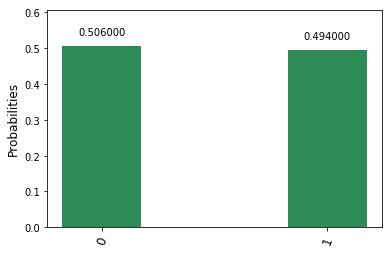

In [16]:
job = execute(qc, backend='local_qasm_simulator', shots = 1000)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

<a id="u1"></a>
## U$_1$ Gate

The last is the U$_1$ gate. In the U$_1$ gate, the angles $\theta$ and $\phi$ are both set to zero. This can add a phase to the qubit.
$$ U_1 (\lambda) = U_3 (0, 0, \lambda) = \begin{pmatrix}
1 & 0 \\
0 & e^{i\lambda} \\
\end{pmatrix}$$

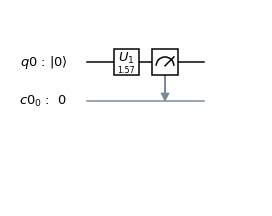

In [17]:
qc = QuantumCircuit(q, c)
qc.x(q)
qc.u1(pi/2,q)
qc.measure(q, c)
drawer(qc)

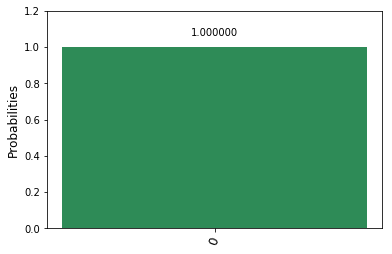

In [18]:
job = execute(qc, backend='local_qasm_simulator', shots = 1000)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

qc = QuantumCircuit(q, c)
qc.x(q)
qc.u1(pi/2,q)
job = execute(qc, backend='local_statevector_simulator')
print("Statevector = ", np.round(job.result().get_statevector(), 3))

A phase does not directly change the output of the qubit. It is only important in more complex algorithms, as we cannot measure a global phase, but phase differences between qubits are measurable.

<a id="hadamard"></a>
## Hadamard Gate
The Hadamard gate maps a qubit, which is in state $|0 \rangle$, to
$$ \frac{1}{\sqrt{2}} ( |0 \rangle + |1 \rangle)$$

and state $|1 \rangle$ to
$$\frac{1}{\sqrt{2}} ( |0 \rangle - |1 \rangle)$$

Its matrix representation is
$$ H = U_3 (\pi/2, 0, \pi) = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\
1 & -1 \\ \end{pmatrix} $$

At first we only initialize the circuit and then measure the qubit directly. After that, we put a Hadamard gate in between and see what happens.

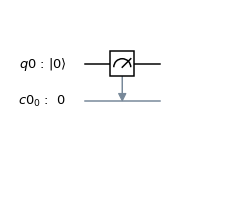

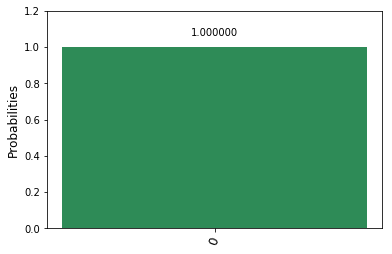

In [19]:
qc = QuantumCircuit(q, c)
qc.measure(q, c)
drawer(qc)
job = execute(qc, backend='local_qasm_simulator', shots = 1000)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

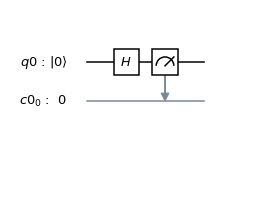

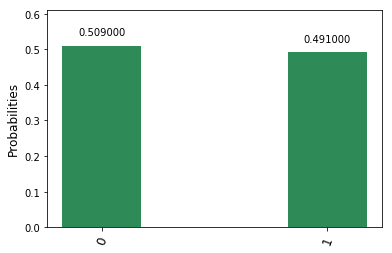

In [20]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
drawer(qc)
job = execute(qc, backend='local_qasm_simulator', shots = 1000)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

<a id="x"></a>
## X Gate

There are a few more basic gates, which can all be implemented through rotations. We will only introduce one more of these gates, which is the X- or NOT-gate. This gate flips the bit, meaning it changes its state from $|0 \rangle$ to $|1 \rangle$ and vice versa.

The matrix representation is
$$ X = U_3 (\pi, 2\pi, \pi) = \begin{pmatrix} 0 & 1 \\ 1 & 0 \\ \end{pmatrix} $$

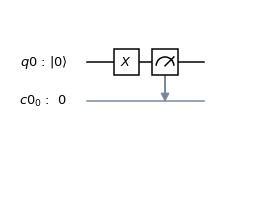

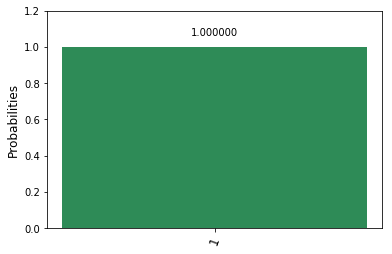

In [21]:
qc = QuantumCircuit(q, c)
qc.x(q)
qc.measure(q, c)
drawer(qc)
job = execute(qc, backend='local_qasm_simulator', shots = 1000)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

<a id="multi"></a>
# Multi-Qubit Gates

To have a fully working quantum circuit, we need a possibility to link qubits together to create entanglement. This is done with the help of multi-qubit gates. There are several possibilities of multi-qubit gates, but they can all be constructed out of single qubit gates and the controlled CNOT.

To correctly interpret the result of multi-qubit circuits, the qubits are ordered from right to left. So the first qubit in a register is the one on the very right side.

<a id="cnot"></a>
## CNOT Gate

The controlled CNOT - gate is a two qubit gate. It changes the state of the target qubit, if and only if the controlling qubit is in state $|1 \rangle$.

The matrix representation for two qubit gates are a 4 x 4 matrix. The CNOT matrix is
$$ CX = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ \end{pmatrix} $$

For this to work we need two qubits now.

In [22]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

We'll see what happens if we use the CNOT gate now without changing anything else. Remember, the qubits are always initialized in state $|0 \rangle$.

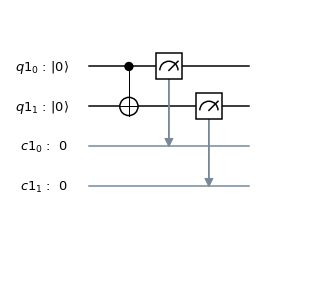

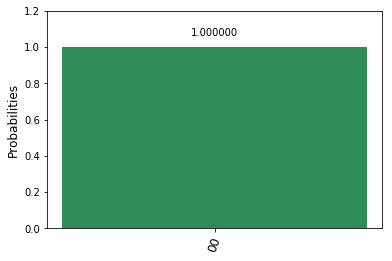

In [23]:
qc = QuantumCircuit(q, c)
qc.cx(q[0], q[1])
qc.measure(q, c)
drawer(qc)
job = execute(qc, backend='local_qasm_simulator', shots = 1000)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

Obviously both qubits stay in the state $|0 \rangle$ as the CNOT gate only acts on the target qubit if the controlling qubit is in state $|1 \rangle$. 

Now we see what happens if we put the controlling qubit in state $|1 \rangle$ before the CNOT gate with the help of an X gate.

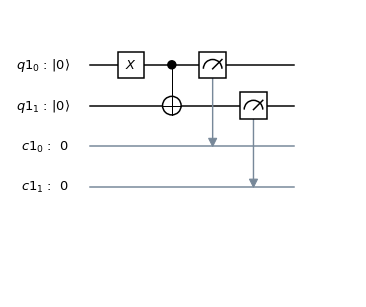

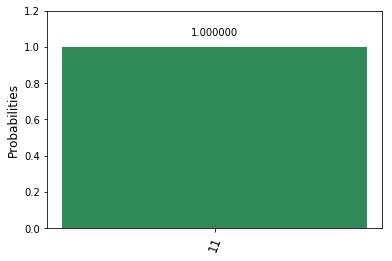

In [24]:
qc = QuantumCircuit(q, c)
qc.x(q[0])
qc.cx(q[0], q[1])
qc.measure(q, c)
drawer(qc)
job = execute(qc, backend='local_qasm_simulator', shots = 1000)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

Now both qubits are in state $|1 \rangle$ before the measurement. 

### Bell State

One special case is if the controlling qubit is in a equal superposition of both states before using the CNOT gate. This can be done with the help of an Hadamard gate.

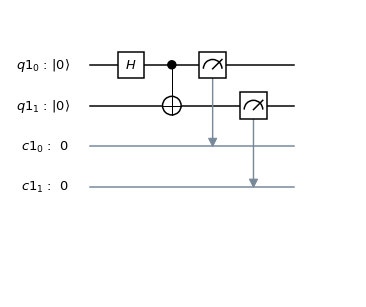

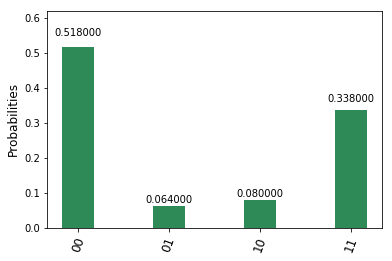

In [25]:
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.measure(q, c)
drawer(qc)
job = execute(qc, backend=backend, shots = 1000)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

This is now a superposition of two possible states, $| 00 \rangle$ and $| 11 \rangle$. Dependent on the outcome of the first measurement, the second qubit has always the same value as the first one. The first measurement is still purely random. This state is called the Bell state.

<a id="swap"></a>
## SWAP Gate

Every gate can be used as an controlled gate, so we will not show them all. One last two qubit gate of interest is the swap gate. The swap gate exchanges the positions of two qubits. We will put the first qubit in state $|1 \rangle$ and the second in state $|0 \rangle$ and then apply the SWAP gate. In comparison we will then execute the circuit without the swap gate.

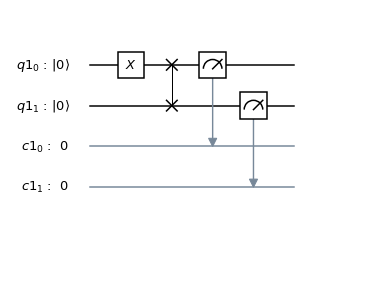

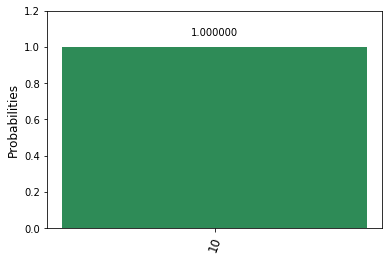

In [26]:
qc = QuantumCircuit(q, c)
qc.x(q[0])
qc.swap(q[0], q[1])
qc.measure(q, c)
drawer(qc)
job = execute(qc, backend='local_qasm_simulator', shots = 1000)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

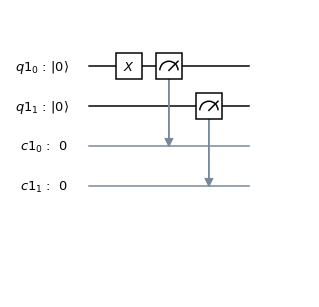

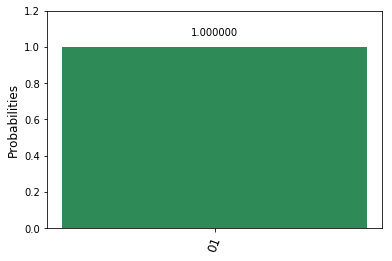

In [27]:
qc = QuantumCircuit(q, c)
qc.x(q[0])
qc.measure(q, c)
drawer(qc)
job = execute(qc, backend='local_qasm_simulator', shots = 1000)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

<a id="toffoli"></a>
## Toffoli Gate

The Toffoli gate is a three qubit gate. It is a universal reversible gate, meaning that all reversible gates can be constructed out of a Toffoli gate. A Toffoli gate can be constructed out of rotation and CNOT gates, which makes them the smallest universal gates for quantum computer.

The Toffoli gate is also called a CCNOT gate. It is made out of three qubits, two controlling and one target qubit. Only if both controlling qubits are in state $|1 \rangle$, the target qubit is flipped. 

The matrix representation is
$$ CCX = \begin{pmatrix}
    1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
    0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
    0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
    \\ \end{pmatrix} $$

In [28]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

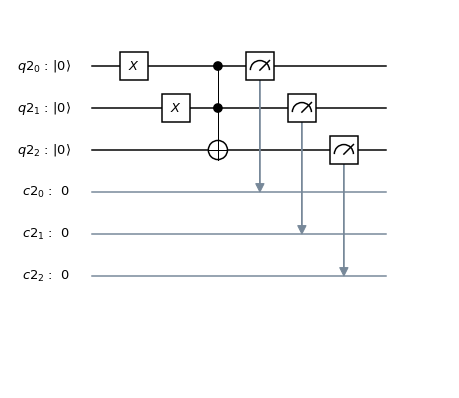

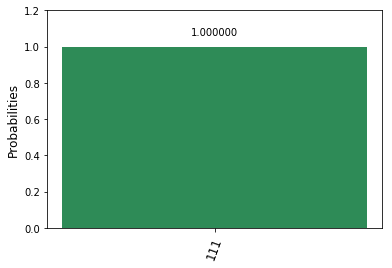

In [29]:
qc = QuantumCircuit(q, c)
qc.x(q[0])
qc.x(q[1])
qc.ccx(q[0], q[1], q[2])
qc.measure(q, c)
drawer(qc)
job = execute(qc, backend='local_qasm_simulator', shots = 1000)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)